# Installing packages

In [2]:
%pip install git+https://github.com/THU-MIG/yolov10.git

  Cloning https://github.com/THU-MIG/yolov10.git to /private/var/folders/9j/h4l0p2dx7px95c35wm6htgr40000gn/T/pip-req-build-kkcyhsnc
  Running command git clone --filter=blob:none --quiet https://github.com/THU-MIG/yolov10.git /private/var/folders/9j/h4l0p2dx7px95c35wm6htgr40000gn/T/pip-req-build-kkcyhsnc
  Resolved https://github.com/THU-MIG/yolov10.git to commit cd2f79c70299c9041fb6d19617ef1296f47575b1
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
  Created wheel for ultralytics: filename=ultralytics-8.1.34-py3-none-any.whl size=731411 sha256=b61736bf5ef86321c9867597a5fe356bb303267ffa179739dbc5e2a07543a1c5
  Stored in directory: /private/var/folders/9j/h4l0p2dx7px95c35wm6htgr40000gn/T/pip-ephem-wheel-cache-t3hkoy52/wheels/43/69/ce/a29f8e396d41edc5db9476051cc64b70a69ade35dc81efbec9

In [5]:
%pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [3]:
!pip install huggingface_hub

  Using cached huggingface_hub-0.24.6-py3-none-any.whl.metadata (13 kB)
Using cached huggingface_hub-0.24.6-py3-none-any.whl (417 kB)


In [7]:
!pip install --upgrade jupyter

  Using cached jupyter-1.1.1-py2.py3-none-any.whl.metadata (2.0 kB)
  Using cached jupyter_console-6.6.3-py3-none-any.whl.metadata (5.8 kB)
  Using cached ipywidgets-8.1.5-py3-none-any.whl.metadata (2.3 kB)
  Using cached widgetsnbextension-4.0.13-py3-none-any.whl.metadata (1.6 kB)
  Using cached jupyterlab_widgets-3.0.13-py3-none-any.whl.metadata (4.1 kB)
Using cached jupyter-1.1.1-py2.py3-none-any.whl (2.7 kB)
Using cached ipywidgets-8.1.5-py3-none-any.whl (139 kB)
Using cached jupyter_console-6.6.3-py3-none-any.whl (24 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 18.0 MB/s eta 0:00:00a 0:00:01
Using cached jupyterlab_widgets-3.0.13-py3-none-any.whl (214 kB)
Using cached widgetsnbextension-4.0.13-py3-none-any.whl (2.3 MB)


In [8]:
!pip install --upgrade ipywidgets

# Importing Yolo V10 Model Trained (Best)

In [1]:
from ultralytics import YOLOv10

In [2]:
model_path = '/Users/Paolo/code/PaoloPiacenti/AI-wave-tracker/model/weights_best_&_last_pt/best.pt'

In [3]:
model = YOLOv10(model_path)

# Test Best Model in some random images

In [15]:
import os
import random

def get_random_image_path(folder_path):
    """
    Selects a random image from the given folder and returns its absolute path.
    
    :param folder_path: Path to the folder containing images.
    :return: Absolute path of the selected random image.
    """
    # List all files in the directory
    all_files = os.listdir(folder_path)
    
    # Filter out image files based on common extensions
    image_extensions = ('.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff')
    image_files = [f for f in all_files if f.lower().endswith(image_extensions)]
    
    # Ensure there are images to select from
    if not image_files:
        raise ValueError("No images found in the folder.")
    
    # Randomly select one image
    selected_image = random.choice(image_files)
    
    # Construct the absolute path
    selected_image_path = os.path.abspath(os.path.join(folder_path, selected_image))
    
    return selected_image_path

In [16]:
folder_path = '/Users/Paolo/code/PaoloPiacenti/wave_pocket_detection/data/images/test'

In [18]:
images = {}

try:
    for i in range(5):
        images[i] = get_random_image_path(folder_path)
except ValueError as e:
    print(e)

In [32]:
image = model(images[3])
image[0].boxes
image[0].show()


image 1/1 /Users/Paolo/code/PaoloPiacenti/wave_pocket_detection/data/images/test/Surfing-Sunday-in-Caparica-28_03_2021-_frame_21_jpg.rf.0009eda0f23631e8c2d4d4db634b0f64.jpg: 640x640 1 pocket, 406.9ms
Speed: 10.5ms preprocess, 406.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


# Predict on straming

In [4]:
import cv2
import torch
from IPython.display import display, clear_output
from PIL import Image
import requests
from io import BytesIO

# Initialize the YOLOv8 model (replace with your trained model's path) # or 'path/to/your/custom/model.pt'

def stream_and_predict(beach):
    # Stream URL
    stream_url = f'https://video-auth1.iol.pt/beachcam/{beach}/playlist.m3u8'

    # Initialize video capture
    cap = cv2.VideoCapture(stream_url)

    # Check if the video capture has been initialized correctly
    if not cap.isOpened():
        print(f"Error: Could not open video stream for {beach}")
        return

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            print("Error: Couldn't read frame.")
            break

        # Apply YOLOv8 model to detect objects in the frame
        
        results = model(frame, stream=True)

        # Draw bounding boxes on the frame
        for r in results:
            boxes = r.boxes.xyxy  # x1, y1, x2, y2
            confs = r.boxes.conf  # Confidence scores
            classes = r.boxes.cls  # Class IDs

            for box, conf, cls in zip(boxes, confs, classes):
                # Extract the coordinates
                x1, y1, x2, y2 = map(int, box)
                
                # Draw the rectangle
                cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
                
                # Annotate with the class and confidence
                label = f'{model.names[int(cls)]}: {conf:.2f}'
                cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        # Convert frame to PIL image for display in Jupyter notebook
        img = Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        
        # Display the frame using IPython display
        clear_output(wait=True)
        display(img)

        # Break loop if you want to stop the execution
        # Here we don't wait for 'q' keypress, because it's impractical in a Jupyter notebook
        # You can insert a break condition based on a certain number of frames or an external trigger
        # For now, this will run indefinitely unless manually interrupted

    # Release the capture
    cap.release()

In [5]:
def _on_timeout(proc, status_dict):
    status_dict['timeout'] = True
    proc.kill()

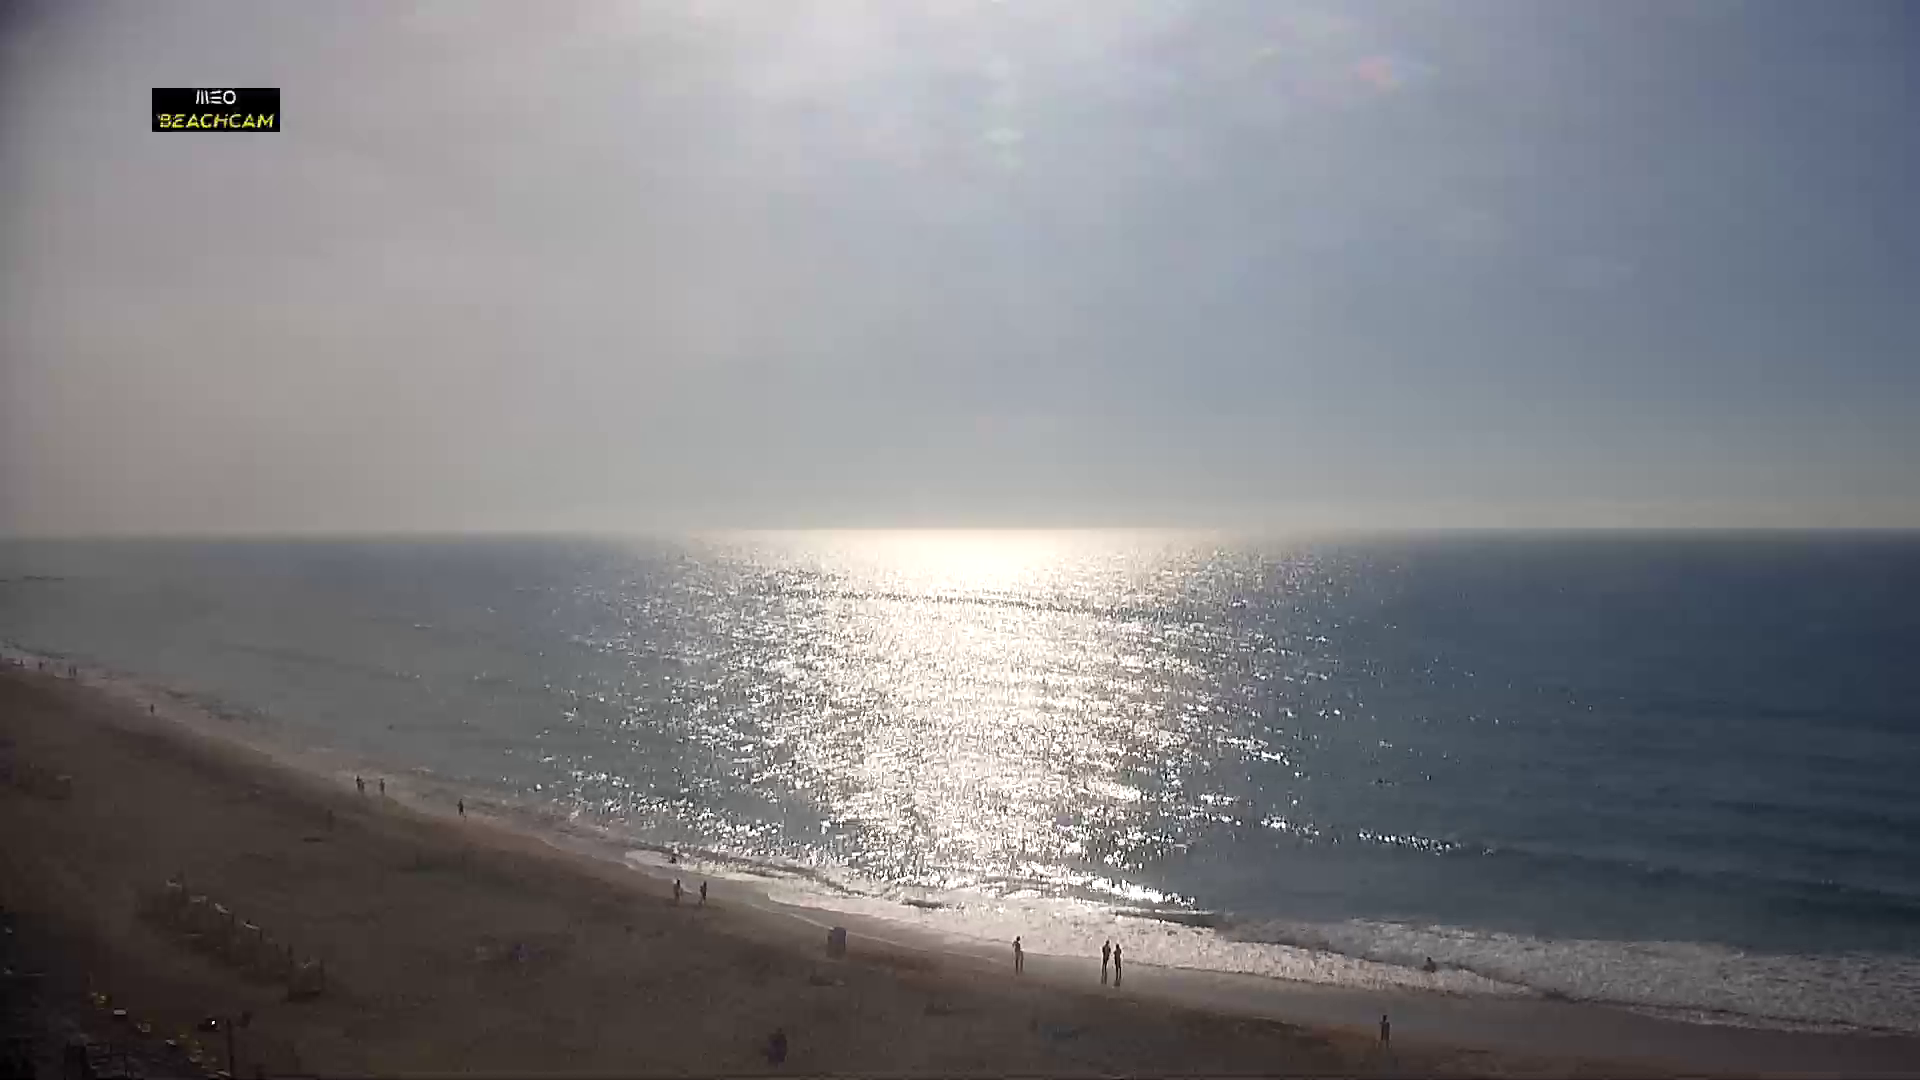

In [ ]:
stream_and_predict('praiagrande')

# Object Tracking

In [4]:
video_path = "/Users/Paolo/code/PaoloPiacenti/wave_pocket_detection/video/preprocessed/test1.mp4"

In [5]:
results = model.track(video_path, show=False)



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/1873) /Users/Paolo/code/PaoloPiacenti/wave_pocket_detection/video/preprocessed/test1.mp4: 384x640 1 pocket, 274.5ms
video 1/1 (frame 2/1873) /Users/Paolo/code/PaoloPiacenti/wave_pocket_detection/video/preprocessed/test1.mp4: 384x640 1 pocket, 208.5ms
video 1/1 (frame 3/1873) /Users/Paolo/code/PaoloPiacenti/wave_pocket_detection/video/preprocessed/test1.mp4: 384x640 1 pocket, 571.9ms
video 1/1 (frame 4/1873) /Users/Paolo/code/PaoloPia

video 1/1 (frame 586/3115) /home/chicocheta/code/PaoloPiacenti/backup/Data/Live Surf Cam_ Uluwatu, Bali - YouTube — Mozilla Firefox 2024-08-29 17-59-26.mp4: 416x640 1 pocket, 58.8ms
video 1/1 (frame 587/3115) /home/chicocheta/code/PaoloPiacenti/backup/Data/Live Surf Cam_ Uluwatu, Bali - YouTube — Mozilla Firefox 2024-08-29 17-59-26.mp4: 416x640 2 pockets, 61.1ms
video 1/1 (frame 588/3115) /home/chicocheta/code/PaoloPiacenti/backup/Data/Live Surf Cam_ Uluwatu, Bali - YouTube — Mozilla Firefox 2024-08-29 17-59-26.mp4: 416x640 2 pockets, 58.7ms
video 1/1 (frame 589/3115) /home/chicocheta/code/PaoloPiacenti/backup/Data/Live Surf Cam_ Uluwatu, Bali - YouTube — Mozilla Firefox 2024-08-29 17-59-26.mp4: 416x640 1 pocket, 52.6ms
video 1/1 (frame 590/3115) /home/chicocheta/code/PaoloPiacenti/backup/Data/Live Surf Cam_ Uluwatu, Bali - YouTube — Mozilla Firefox 2024-08-29 17-59-26.mp4: 416x640 1 pocket, 50.9ms
video 1/1 (frame 591/3115) /home/chicocheta/code/PaoloPiacenti/backup/Data/Live Surf Cam

video 1/1 (frame 631/3115) /home/chicocheta/code/PaoloPiacenti/backup/Data/Live Surf Cam_ Uluwatu, Bali - YouTube — Mozilla Firefox 2024-08-29 17-59-26.mp4: 416x640 (no detections), 49.9ms
video 1/1 (frame 632/3115) /home/chicocheta/code/PaoloPiacenti/backup/Data/Live Surf Cam_ Uluwatu, Bali - YouTube — Mozilla Firefox 2024-08-29 17-59-26.mp4: 416x640 (no detections), 52.7ms
video 1/1 (frame 633/3115) /home/chicocheta/code/PaoloPiacenti/backup/Data/Live Surf Cam_ Uluwatu, Bali - YouTube — Mozilla Firefox 2024-08-29 17-59-26.mp4: 416x640 (no detections), 46.8ms
video 1/1 (frame 634/3115) /home/chicocheta/code/PaoloPiacenti/backup/Data/Live Surf Cam_ Uluwatu, Bali - YouTube — Mozilla Firefox 2024-08-29 17-59-26.mp4: 416x640 (no detections), 49.6ms
video 1/1 (frame 635/3115) /home/chicocheta/code/PaoloPiacenti/backup/Data/Live Surf Cam_ Uluwatu, Bali - YouTube — Mozilla Firefox 2024-08-29 17-59-26.mp4: 416x640 (no detections), 49.2ms
video 1/1 (frame 636/3115) /home/chicocheta/code/PaoloP

video 1/1 (frame 675/3115) /home/chicocheta/code/PaoloPiacenti/backup/Data/Live Surf Cam_ Uluwatu, Bali - YouTube — Mozilla Firefox 2024-08-29 17-59-26.mp4: 416x640 (no detections), 50.1ms
video 1/1 (frame 676/3115) /home/chicocheta/code/PaoloPiacenti/backup/Data/Live Surf Cam_ Uluwatu, Bali - YouTube — Mozilla Firefox 2024-08-29 17-59-26.mp4: 416x640 (no detections), 47.7ms
video 1/1 (frame 677/3115) /home/chicocheta/code/PaoloPiacenti/backup/Data/Live Surf Cam_ Uluwatu, Bali - YouTube — Mozilla Firefox 2024-08-29 17-59-26.mp4: 416x640 (no detections), 50.1ms
video 1/1 (frame 678/3115) /home/chicocheta/code/PaoloPiacenti/backup/Data/Live Surf Cam_ Uluwatu, Bali - YouTube — Mozilla Firefox 2024-08-29 17-59-26.mp4: 416x640 (no detections), 46.7ms
video 1/1 (frame 679/3115) /home/chicocheta/code/PaoloPiacenti/backup/Data/Live Surf Cam_ Uluwatu, Bali - YouTube — Mozilla Firefox 2024-08-29 17-59-26.mp4: 416x640 (no detections), 48.0ms
video 1/1 (frame 680/3115) /home/chicocheta/code/PaoloP

video 1/1 (frame 719/3115) /home/chicocheta/code/PaoloPiacenti/backup/Data/Live Surf Cam_ Uluwatu, Bali - YouTube — Mozilla Firefox 2024-08-29 17-59-26.mp4: 416x640 (no detections), 34.9ms
video 1/1 (frame 720/3115) /home/chicocheta/code/PaoloPiacenti/backup/Data/Live Surf Cam_ Uluwatu, Bali - YouTube — Mozilla Firefox 2024-08-29 17-59-26.mp4: 416x640 (no detections), 37.7ms
video 1/1 (frame 721/3115) /home/chicocheta/code/PaoloPiacenti/backup/Data/Live Surf Cam_ Uluwatu, Bali - YouTube — Mozilla Firefox 2024-08-29 17-59-26.mp4: 416x640 (no detections), 36.2ms
video 1/1 (frame 722/3115) /home/chicocheta/code/PaoloPiacenti/backup/Data/Live Surf Cam_ Uluwatu, Bali - YouTube — Mozilla Firefox 2024-08-29 17-59-26.mp4: 416x640 (no detections), 37.8ms
video 1/1 (frame 723/3115) /home/chicocheta/code/PaoloPiacenti/backup/Data/Live Surf Cam_ Uluwatu, Bali - YouTube — Mozilla Firefox 2024-08-29 17-59-26.mp4: 416x640 (no detections), 35.5ms
video 1/1 (frame 724/3115) /home/chicocheta/code/PaoloP

video 1/1 (frame 763/3115) /home/chicocheta/code/PaoloPiacenti/backup/Data/Live Surf Cam_ Uluwatu, Bali - YouTube — Mozilla Firefox 2024-08-29 17-59-26.mp4: 416x640 (no detections), 36.1ms
video 1/1 (frame 764/3115) /home/chicocheta/code/PaoloPiacenti/backup/Data/Live Surf Cam_ Uluwatu, Bali - YouTube — Mozilla Firefox 2024-08-29 17-59-26.mp4: 416x640 (no detections), 37.7ms
video 1/1 (frame 765/3115) /home/chicocheta/code/PaoloPiacenti/backup/Data/Live Surf Cam_ Uluwatu, Bali - YouTube — Mozilla Firefox 2024-08-29 17-59-26.mp4: 416x640 (no detections), 34.9ms
video 1/1 (frame 766/3115) /home/chicocheta/code/PaoloPiacenti/backup/Data/Live Surf Cam_ Uluwatu, Bali - YouTube — Mozilla Firefox 2024-08-29 17-59-26.mp4: 416x640 (no detections), 34.2ms
video 1/1 (frame 767/3115) /home/chicocheta/code/PaoloPiacenti/backup/Data/Live Surf Cam_ Uluwatu, Bali - YouTube — Mozilla Firefox 2024-08-29 17-59-26.mp4: 416x640 (no detections), 33.4ms
video 1/1 (frame 768/3115) /home/chicocheta/code/PaoloP

video 1/1 (frame 807/3115) /home/chicocheta/code/PaoloPiacenti/backup/Data/Live Surf Cam_ Uluwatu, Bali - YouTube — Mozilla Firefox 2024-08-29 17-59-26.mp4: 416x640 (no detections), 35.0ms
video 1/1 (frame 808/3115) /home/chicocheta/code/PaoloPiacenti/backup/Data/Live Surf Cam_ Uluwatu, Bali - YouTube — Mozilla Firefox 2024-08-29 17-59-26.mp4: 416x640 (no detections), 36.3ms
video 1/1 (frame 809/3115) /home/chicocheta/code/PaoloPiacenti/backup/Data/Live Surf Cam_ Uluwatu, Bali - YouTube — Mozilla Firefox 2024-08-29 17-59-26.mp4: 416x640 (no detections), 36.1ms
video 1/1 (frame 810/3115) /home/chicocheta/code/PaoloPiacenti/backup/Data/Live Surf Cam_ Uluwatu, Bali - YouTube — Mozilla Firefox 2024-08-29 17-59-26.mp4: 416x640 (no detections), 52.9ms
video 1/1 (frame 811/3115) /home/chicocheta/code/PaoloPiacenti/backup/Data/Live Surf Cam_ Uluwatu, Bali - YouTube — Mozilla Firefox 2024-08-29 17-59-26.mp4: 416x640 (no detections), 51.5ms
video 1/1 (frame 812/3115) /home/chicocheta/code/PaoloP

KeyboardInterrupt: 

In [9]:
type(results)

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'pocket'}
 obb: None
 orig_img: array([[[127, 119, 114],
         [127, 119, 114],
         [127, 119, 114],
         ...,
         [166, 153, 144],
         [166, 153, 144],
         [166, 153, 144]],
 
        [[127, 119, 114],
         [127, 119, 114],
         [127, 119, 114],
         ...,
         [166, 153, 144],
         [166, 153, 144],
         [166, 153, 144]],
 
        [[127, 119, 114],
         [127, 119, 114],
         [127, 119, 114],
         ...,
         [166, 153, 144],
         [166, 153, 144],
         [166, 153, 144]],
 
        ...,
 
        [[108, 108, 115],
         [108, 108, 115],
         [108, 108, 115],
         ...,
         [124, 133, 148],
         [124, 133, 148],
         [124, 133, 148]],
 
        [[108, 108, 115],
         [108, 108, 115],
         [108, 108, 115],
         ...,
         [102, 111